# Praca domowa 3

In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import math
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
import warnings
warnings.filterwarnings('ignore')


## Wczytanie danych

In [76]:
data = pd.read_csv("https://raw.githubusercontent.com/mini-pw/2021L-WUM/main/Prace_domowe/Praca_domowa3/australia.csv")
data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,17.9,35.2,0.0,12.0,12.3,48.0,6.0,20.0,20.0,13.0,1006.3,1004.4,2.0,5.0,26.6,33.4,0,0
1,18.4,28.9,0.0,14.8,13.0,37.0,19.0,19.0,30.0,8.0,1012.9,1012.1,1.0,1.0,20.3,27.0,0,0
2,19.4,37.6,0.0,10.8,10.6,46.0,30.0,15.0,42.0,22.0,1012.3,1009.2,1.0,6.0,28.7,34.9,0,0
3,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,0,0
4,24.2,41.0,0.0,11.2,8.4,35.0,17.0,13.0,19.0,15.0,1010.7,1007.4,1.0,6.0,33.6,37.6,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,19.3,33.4,0.0,6.0,11.0,35.0,9.0,20.0,63.0,32.0,1013.9,1010.5,0.0,1.0,24.5,32.3,0,0
56416,21.2,32.6,0.0,7.6,8.6,37.0,13.0,11.0,56.0,28.0,1014.6,1011.2,7.0,0.0,24.8,32.0,0,0
56417,20.7,32.8,0.0,5.6,11.0,33.0,17.0,11.0,46.0,23.0,1015.3,1011.8,0.0,0.0,24.8,32.1,0,0
56418,19.5,31.8,0.0,6.2,10.6,26.0,9.0,17.0,62.0,58.0,1014.9,1010.7,1.0,1.0,24.8,29.2,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56420 entries, 0 to 56419
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        56420 non-null  float64
 1   MaxTemp        56420 non-null  float64
 2   Rainfall       56420 non-null  float64
 3   Evaporation    56420 non-null  float64
 4   Sunshine       56420 non-null  float64
 5   WindGustSpeed  56420 non-null  float64
 6   WindSpeed9am   56420 non-null  float64
 7   WindSpeed3pm   56420 non-null  float64
 8   Humidity9am    56420 non-null  float64
 9   Humidity3pm    56420 non-null  float64
 10  Pressure9am    56420 non-null  float64
 11  Pressure3pm    56420 non-null  float64
 12  Cloud9am       56420 non-null  float64
 13  Cloud3pm       56420 non-null  float64
 14  Temp9am        56420 non-null  float64
 15  Temp3pm        56420 non-null  float64
 16  RainToday      56420 non-null  int64  
 17  RainTomorrow   56420 non-null  int64  
dtypes: flo

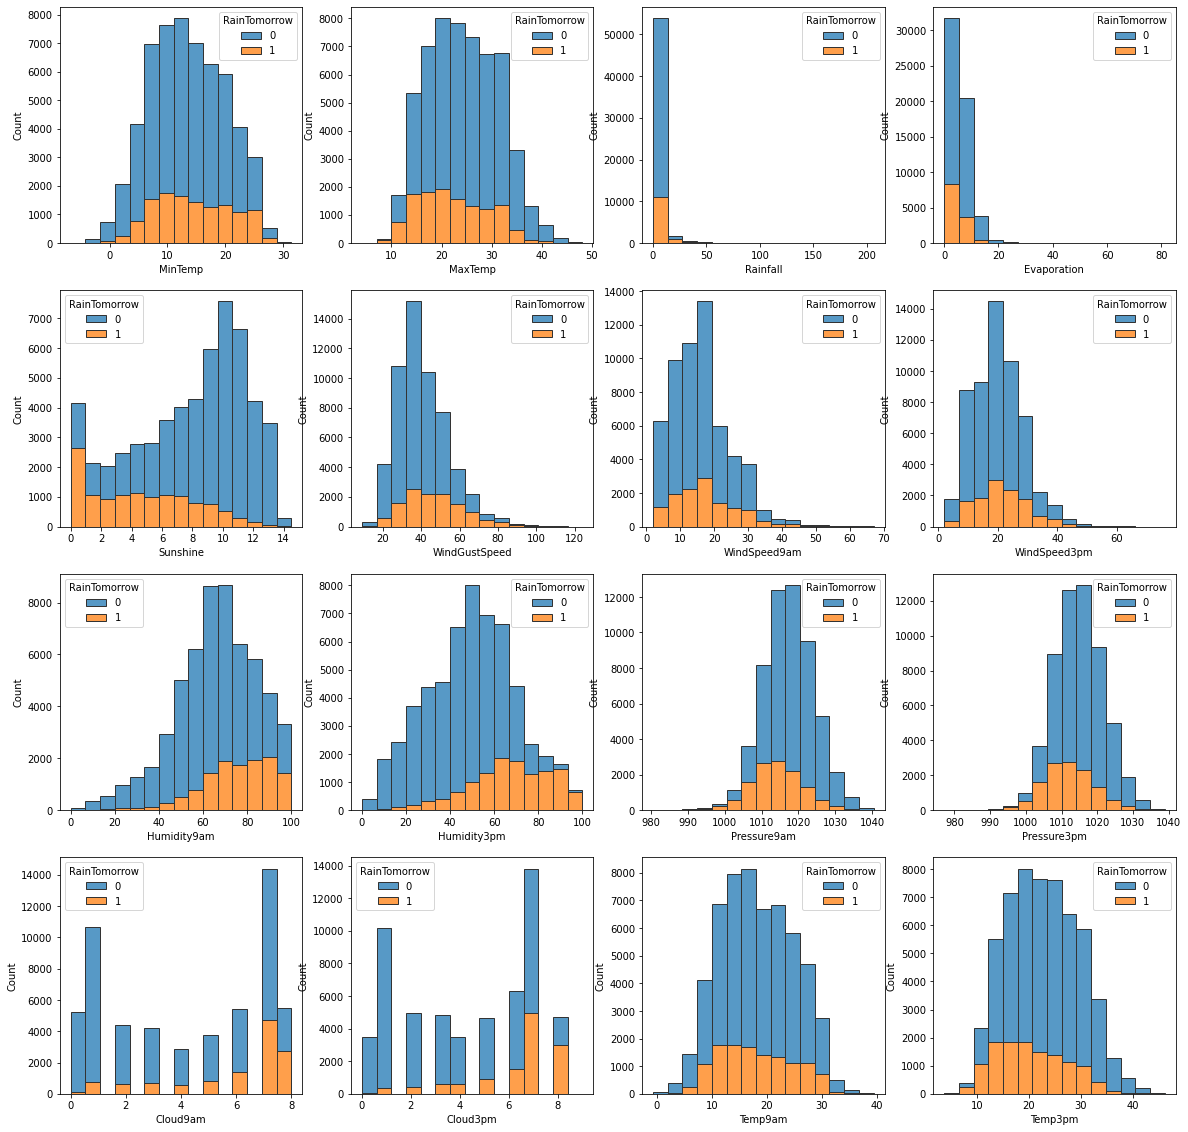

In [77]:
data.info() #Wszystkie kolumny zawierają zmienne numeryczne

fig, ax = plt.subplots(4,4, figsize=(20, 20))

i = 0
j = 0

for column in data.columns[:16]:
    sns.histplot(data,
        x=column, hue="RainTomorrow",
        multiple="stack",
        edgecolor=".2",
        bins = 15,
        ax=ax[j][i])
    i += 1
    if i % 4 == 0:
        j += 1
        i = 0

plt.show()

### Skalowanie danych

In [78]:
from sklearn.preprocessing import MinMaxScaler

cols = data.columns
scaler = MinMaxScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns = cols)

data['Rainfall'] = np.log1p(data['Rainfall'])
data['Evaporation'] = np.log1p(data['Evaporation'])

data

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0.645669,0.706818,0.0,0.137832,0.848276,0.339130,0.061538,0.243243,0.20,0.13,0.430718,0.441748,0.250,0.555556,0.680798,0.700472,0.0,0.0
1,0.658793,0.563636,0.0,0.167433,0.896552,0.243478,0.261538,0.229730,0.30,0.08,0.540902,0.566343,0.125,0.111111,0.523691,0.549528,0.0,0.0
2,0.685039,0.761364,0.0,0.124873,0.731034,0.321739,0.430769,0.175676,0.42,0.22,0.530885,0.519417,0.125,0.666667,0.733167,0.735849,0.0,0.0
3,0.750656,0.779545,0.0,0.131374,0.841379,0.191304,0.061538,0.054054,0.37,0.22,0.537563,0.517799,0.125,0.555556,0.743142,0.752358,0.0,0.0
4,0.811024,0.838636,0.0,0.129212,0.579310,0.226087,0.230769,0.148649,0.19,0.15,0.504174,0.490291,0.125,0.666667,0.855362,0.799528,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56415,0.682415,0.665909,0.0,0.071289,0.758621,0.226087,0.107692,0.243243,0.63,0.32,0.557596,0.540453,0.000,0.111111,0.628429,0.674528,0.0,0.0
56416,0.732283,0.647727,0.0,0.089471,0.593103,0.243478,0.169231,0.121622,0.56,0.28,0.569282,0.551780,0.875,0.000000,0.635910,0.667453,0.0,0.0
56417,0.719160,0.652273,0.0,0.066691,0.758621,0.208696,0.230769,0.121622,0.46,0.23,0.580968,0.561489,0.000,0.000000,0.635910,0.669811,0.0,0.0
56418,0.687664,0.629545,0.0,0.073580,0.731034,0.147826,0.107692,0.202703,0.62,0.58,0.574290,0.543689,0.125,0.111111,0.635910,0.601415,0.0,0.0


### Podział zbioru danych na treningowe i testowe

In [79]:
X = data.loc[:, data.columns != "RainTomorrow"]
y = data.RainTomorrow

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 45)

### Klasyfikacja

In [80]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, f1_score, mean_squared_error

indicators = ["recall", "accuracy", "roc auc", "f1"]


def print_results(name, res_):
    print(name, 'accuracy score: {0:0.4f}'. format(accuracy_score(y_test, res_)))
    print(name, 'recall score: {0:0.4f}'. format(recall_score(y_test, res_)))
    print(name, 'roc_auc score: {0:0.4f}'. format(roc_auc_score(y_test, res_)))
    print(name, 'f1 score: {0:0.4f}'. format(f1_score(y_test, res_)))

### Regresja logistyczna 
- max_iter - maksymalna liczba iteracji

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate

lr = LogisticRegression(max_iter=1000).fit(X_train, y_train)
y_hat = lr.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_hat), end = "\n")
print_results("Logistic Regression", y_hat)

MSE: 0.1479617157036512
Logistic Regression accuracy score: 0.8520
Logistic Regression recall score: 0.5312
Logistic Regression roc_auc score: 0.7372
Logistic Regression f1 score: 0.6137


### Gradient Boosting Classifier
- min_samples_split - minimalna liczba obserwacji do podziału wewnętrznego węzła
- learning_rate - zmiana kontrubucji każdego z drzew do wyniku modelu

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

model2 = GradientBoostingClassifier(min_samples_split = 3, learning_rate=0.3).fit(X_train, y_train)

y_hat = model2.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_hat), end = "\n")
print_results("Gradient Boosting" ,y_hat)

MSE: 0.14505494505494507
Gradient Boosting accuracy score: 0.8549
Gradient Boosting recall score: 0.5364
Gradient Boosting roc_auc score: 0.7409
Gradient Boosting f1 score: 0.6207


### Voting Classifier
- weights - ustala wagę predykcji poszczególnych klasyfikatorów dla wyniku całego modelu
- estimators - lista klasyfikatorów, które dokonują predykcji

In [83]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, max_depth=4).fit(X_train, y_train)
model_vote = VotingClassifier(estimators=[('RandomForest', rf), ('LR', lr)], voting='hard', weights=[0.8, 0.2]).fit(X_train, y_train)
y_hat = model_vote.predict(X_test)


print("MSE:", mean_squared_error(y_test, y_hat), end = "\n")
print_results("Voting Classifier", y_hat)

MSE: 0.1575327897908543
Voting Classifier accuracy score: 0.8425
Voting Classifier recall score: 0.3835
Voting Classifier roc_auc score: 0.6782
Voting Classifier f1 score: 0.5186


## Podsumowanie wyników

W celu przetestowania wyników modeli, porównałam ich metryki, tj. wartości wskaźników `roc_auc`, `recall`, `accuracy`, `f1` oraz `MSE`
- Najlepsze wyniki uzyskał model **Gradient Boosting Classifier**
- Metryki klasyfikatorów *Logistic Regression*, *Gradient Boosting Classifier* oraz *Voting Classifier* były bardzo zbliżone.
- Dla modelu Voting Classifier zwiększenie wagi głosów *Random Forest Classifier* obniża skuteczność klasyfikatora (największe różnice dla miary `recall`)
- Najmniejszą wartość błędu `MSE` uzyskał *Gradient Boosting Classifier* (MSE = 0.145)